# DAMASK WORKFLOWS
This jupyter notebook describes a typical DAMASK workflow. There can be variations of this workflow, but this is the simplest possible test case.

The DAMASK version used here is - development version (version number: 3.0.0 )

Currently, run this jupyter notebook on maws03 workstation



## Pre-processing 
### Geometry generation
Create a geometry file for DAMASK from scratch


In [1]:
from damask import Geom
from damask import seeds
import numpy as np
import subprocess,shlex
import os
import damask
from simulation_runner import simulation

ImportError: cannot import name 'seeds' from 'damask' (/nethome/storage/raid1/v.shah/DAMASK/python/damask/__init__.py)

Defining simulation folder and file names

In [2]:
simulation_folder = 'Examples/'
load = 'tensionX.load'
geom_name = 'test.geom'
job_file = '{}_{}.hdf5'.format(geom_name.split('.')[0],load.split('.')[0])

In [3]:
os.chdir(simulation_folder)

User defines the microstructure parameters:
Grid : grid dimensions
Size : Physical size of the RVE in m
Grains/Seeds : number of grains in the geometry

In [4]:
grid = np.array([16,16,16])
size = np.array([1.0,1.0,1.0])
grains = 20

Generate the seeds for Voronoi tesellation

In [5]:
seeds = seeds.from_random(size,grains)

In [6]:
new_geom = Geom.from_Voronoi_tessellation(grid,size,seeds)

Save the geom file as .geom file

In [7]:
new_geom.save_ASCII(geom_name)

Can also have geom file saved as .vtr for visualization
(recent DAMASK can read vtr files and run simulations directly, but in mybinder that is not yet available)
Therefore, we stick to old format of using ASCII files here. 

In [ ]:
new_geom.save(geom_name.split('.')[0])

### Geometry visualization part

In [10]:
import pyvista as pv
mesh = pv.read(geom_name.split('.')[0] +'.vtr')  #enter the file name you wish to view

In [9]:
from itkwidgets import view
import itk

In [10]:
pl = pv.PlotterITK()
pl.add_mesh(mesh)
pl.show(True)

Viewer(geometries=[{'vtkClass': 'vtkPolyData', 'points': {'vtkClass': 'vtkPoints', 'name': '_points', 'numberO…

### Load definition

Load definition in this example in form of .load files. 
Migrating to having YAML based load definition.

## Run Simulation

In [9]:
simulation.run(simulation_folder,geom_name,load)

0

## Post-process data

Example will generate stress, strain distributions and a stress strain curve

In [4]:
import damask

Calculations to add von Mises stress and strain values

In [5]:
d = damask.Result(job_file)
d.add_Cauchy()
d.add_strain_tensor()
d.add_Mises('sigma')
d.add_Mises('epsilon_V^0.0(F)')
d.add_calculation('avg_sigma',"np.average(#sigma_vM#)")
d.add_calculation('avg_epsilon',"np.average(#epsilon_V^0.0(F)_vM#)")

 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00
 ██████████████████████████████████████████████████ 100% ETA 0:00:00


## Plotting and vtr files

In [6]:
import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pyplot as PyPlot
import numpy as np
import h5py
from Plot_stress_strain import plot

In [7]:
%matplotlib inline

/nethome/storage/raid1/v.shah/Test_codes/DAMASK_workflows/Plot_stress_strain.py:24: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  hdf = h5py.File(d.fname)


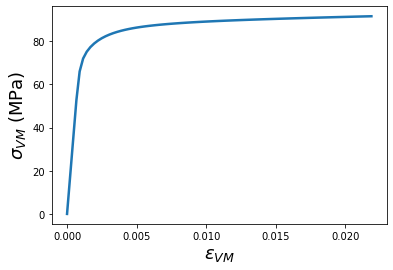

In [8]:
plot(job_file)

In [9]:
d.save_vtk(['sigma','epsilon_V^0.0(F)','sigma_vM','epsilon_V^0.0(F)_vM'])

 ██████████████████████████████████████████████████ 100% ETA 0:00:00


## View VTK files in the notebook itself

In [ ]:
import pyvista as pv
inc=20
mesh = pv.read(job_file.split('.')[0] + f'_inc{inc}.vtr')  #enter the file name you wish to view

In [ ]:
from itkwidgets import view
import itk

In [ ]:
mesh

In [ ]:
pl = pv.PlotterITK()
pl.add_mesh(mesh)
pl.show()